In [69]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

In [70]:
# Load in and read HPI/CPI data
file = '../Resources/US_CpiHpiAvg.csv'

hpi_df = pd.read_csv(file)
hpi_df

,Place Name,Year,Index (SA),Average CPI
0,United States,1991,100.660833,136.191667
1,United States,1992,103.180000,140.316667
2,United States,1993,105.669167,144.458333
3,United States,1994,109.200000,148.225000
4,United States,1995,112.015833,152.383333
5,United States,1996,115.316667,156.850000
6,United States,1997,118.604167,160.516667
7,United States,1998,124.329167,163.008333
8,United States,1999,131.912500,166.575000
9,United States,2000,140.740000,172.200000


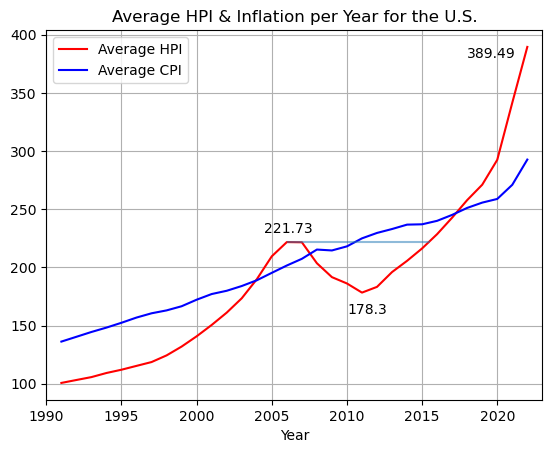

In [71]:
# Line plot for average HPI and CPI for U.S.
index, = plt.plot(hpi_df['Year'], hpi_df['Index (SA)'], 
                  color='red', label= 'Average HPI')
cpi, = plt.plot(hpi_df['Year'], hpi_df['Average CPI'], 
                color='blue', label= 'Average CPI')
plt.xlabel('Year')
plt.xlim(1990, 2023)
plt.annotate(round(hpi_df['Index (SA)'][15], 2), (2004.5, 230))
plt.annotate(round(hpi_df['Index (SA)'][20], 2), (2010, 160))
plt.annotate(round(hpi_df['Index (SA)'][31], 2), (2018, 380))
plt.title('Average HPI & Inflation per Year for the U.S.')
plt.hlines(hpi_df['Index (SA)'][15], 2006, 2015.5, alpha=0.5)
plt.legend()
plt.grid()
plt.show()


### Now we want % change!

In [72]:
# Create new columns detailing percentage change
hpi_df['Index (SA) % Change'] = hpi_df['Index (SA)'].pct_change()
hpi_df['Average CPI % Change'] = hpi_df['Average CPI'].pct_change()

# If the percent change is 0, replace NaN with 0
hpi_df = hpi_df.fillna(0)

# Format columns as percentages
hpi_df['Index (SA) % Change'] = hpi_df['Index (SA) % Change'].map("{:.2%}".format)
hpi_df['Average CPI % Change'] = hpi_df['Average CPI % Change'].map("{:.2%}".format)

hpi_df

,Place Name,Year,Index (SA),Average CPI,Index (SA) % Change,Average CPI % Change
0,United States,1991,100.660833,136.191667,0.00%,0.00%
1,United States,1992,103.180000,140.316667,2.50%,3.03%
2,United States,1993,105.669167,144.458333,2.41%,2.95%
3,United States,1994,109.200000,148.225000,3.34%,2.61%
4,United States,1995,112.015833,152.383333,2.58%,2.81%
5,United States,1996,115.316667,156.850000,2.95%,2.93%
6,United States,1997,118.604167,160.516667,2.85%,2.34%
7,United States,1998,124.329167,163.008333,4.83%,1.55%
8,United States,1999,131.912500,166.575000,6.10%,2.19%
9,United States,2000,140.740000,172.200000,6.69%,3.38%


In [73]:
# Here is where I want to plot percent change...

TypeError: arange() requires stop to be specified.

### Now, make line graphs for West South Central region's HPI and CPI
- This matters because most of us are in Austin and belong to this region

In [ ]:
# Now, line graph for HPI and CPI for West South Central census division 2019-2022
# Loan in HPI data to include months
hpi_file = '../Resources/clean_monthly_hpi.csv'

us_hpi_monthly = pd.read_csv(hpi_file)

wsc_hpi_monthly = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'West South Central Division') & 
                                     (us_hpi_monthly['Year'] >= 2018), :]

# Merge columns just to be able to plot the x axis in chronological order
wsc_hpi_monthly['Year & Month'] = wsc_hpi_monthly['Year'].astype(str) + ' & ' + wsc_hpi_monthly['Period'].astype(str)

wsc_hpi_monthly

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Place Name,Year,Period,Index (SA),Year & Month
3388,West South Central Division,2018,1,264.42,2018 & 1
3389,West South Central Division,2018,2,268.69,2018 & 2
3390,West South Central Division,2018,3,267.71,2018 & 3
3391,West South Central Division,2018,4,269.00,2018 & 4
3392,West South Central Division,2018,5,269.42,2018 & 5
3393,West South Central Division,2018,6,270.33,2018 & 6
3394,West South Central Division,2018,7,271.27,2018 & 7
3395,West South Central Division,2018,8,272.90,2018 & 8
3396,West South Central Division,2018,9,272.51,2018 & 9
3397,West South Central Division,2018,10,274.13,2018 & 10


In [ ]:
# Load in West South Central CPI data
wsc_cpi_file = '../Resources/wsc_CPI.csv'

wsc_cpi = pd.read_csv(wsc_cpi_file)

# Filter out preliminary month AND first and second half rows
wsc_cpi = wsc_cpi.loc[(wsc_cpi['Period'] != 'M13') & 
                      (wsc_cpi['Period'] != 'S01') & 
                      (wsc_cpi['Period'] != 'S02')]

# Rename Value to CPI Value
wsc_cpi = wsc_cpi.rename(columns={'Value': 'CPI Value'})

# Delete last row to be consistent with HPI data timeframe (no 12th month in 2022 for HPI dataset)
wsc_cpi = wsc_cpi.drop([71])

wsc_cpi = wsc_cpi[['Year', 'Period', 'CPI Value']]
wsc_cpi.head()

,Year,Period,CPI Value
0,2018,M01,239.772
1,2018,M02,241.123
2,2018,M03,241.595
3,2018,M04,242.486
4,2018,M05,243.279


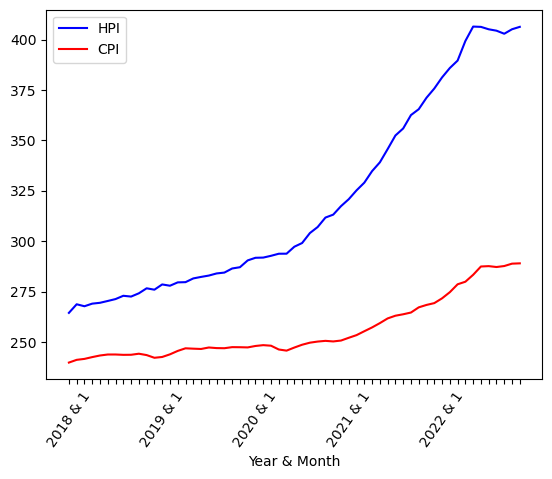

In [ ]:
# Set x axis and variables
x_axis = wsc_hpi_monthly['Year & Month']
hpi_line = wsc_hpi_monthly['Index (SA)']
cpi_line = wsc_cpi['CPI Value']

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=55)

hpi_handle, = plt.plot(x_axis, hpi_line, color='blue', label="HPI")
cpi_handle, = plt.plot(x_axis, cpi_line, color='red', label="CPI")

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend(handles = [hpi_handle, cpi_handle])
plt.xlabel('Year & Month')

plt.show()

### 2017 to 2019


In [82]:
# 2017 to 2019 HPI only

us_hpi_monthly2 = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'United States') & 
                                     (us_hpi_monthly['Year'] >= 2017) &
                                     (us_hpi_monthly['Year'] <= 2019), :]

# Merge columns just to be able to plot the x axis in chronological order
us_hpi_monthly2['Year & Month2'] = us_hpi_monthly2['Year'].astype(str) + ' & ' + us_hpi_monthly2['Period'].astype(str)

us_hpi_monthly2

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Place Name,Year,Period,Index (SA),Year & Month2
3759,United States,2017,1,235.30,2017 & 1
3760,United States,2017,2,236.68,2017 & 2
3761,United States,2017,3,238.15,2017 & 3
3762,United States,2017,4,239.99,2017 & 4
3763,United States,2017,5,241.09,2017 & 5
3764,United States,2017,6,242.04,2017 & 6
3765,United States,2017,7,243.35,2017 & 7
3766,United States,2017,8,244.97,2017 & 8
3767,United States,2017,9,245.98,2017 & 9
3768,United States,2017,10,247.07,2017 & 10


In [ ]:
# Line plot for 2017 to 2019

### 2020 to 2022

In [83]:
# 2020 to 2022 HPI only

us_hpi_monthly3 = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'United States') & 
                                     (us_hpi_monthly['Year'] >= 2020) &
                                     (us_hpi_monthly['Year'] <= 2022), :]

# Merge columns just to be able to plot the x axis in chronological order
us_hpi_monthly3['Year & Month3'] = us_hpi_monthly3['Year'].astype(str) + ' & ' + us_hpi_monthly3['Period'].astype(str)

us_hpi_monthly3

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Place Name,Year,Period,Index (SA),Year & Month3
3795,United States,2020,1,280.76,2020 & 1
3796,United States,2020,2,282.64,2020 & 2
3797,United States,2020,3,283.15,2020 & 3
3798,United States,2020,4,283.82,2020 & 4
3799,United States,2020,5,283.15,2020 & 5
3800,United States,2020,6,286.41,2020 & 6
3801,United States,2020,7,290.27,2020 & 7
3802,United States,2020,8,295.21,2020 & 8
3803,United States,2020,9,299.76,2020 & 9
3804,United States,2020,10,304.38,2020 & 10


In [ ]:
# Line plot for 2020 to 2022 for Index

### Now, see how strongly HPI and CPI are correlated

In [ ]:
# We want to calculate correlation coefficient
# Reformatted the CPI dataset so that it is in column format with months and years
cpi_file = '../Resources/us_cpi.csv'

us_cpi_monthly = pd.read_csv(cpi_file)

# Filter out first and second half rows
us_cpi_monthly = us_cpi_monthly.loc[(us_cpi_monthly['Period'] != 'S01') & 
                                    (us_cpi_monthly['Period'] != 'S02')]

# Delete last row to be consistent with HPI data timeframe (no 12th month in 2022 for HPI dataset)
us_cpi_monthly = us_cpi_monthly.drop([445])

# Get rid of series ID
monthly_cpi_clean = us_cpi_monthly[['Year', 'Period', 'Value']]

# Rename value to CPI
monthly_cpi_clean = monthly_cpi_clean.rename(columns={'Value': 'CPI'})

monthly_cpi_clean

,Year,Period,CPI
0,1991,M01,134.600
1,1991,M02,134.800
2,1991,M03,135.000
3,1991,M04,135.200
4,1991,M05,135.600
...,...,...,...
440,2022,M07,296.276
441,2022,M08,296.171
442,2022,M09,296.808
443,2022,M10,298.012


In [ ]:
# Filter for national data only
us_hpi_monthly = us_hpi_monthly.loc[us_hpi_monthly['Place Name'] == 'United States', :]

us_hpi_monthly = us_hpi_monthly[['Place Name', 'Year', 'Period', 'Index (SA)']]

us_hpi_monthly

,Place Name,Year,Period,Index (SA)
3447,United States,1991,1,100.00
3448,United States,1991,2,100.45
3449,United States,1991,3,100.48
3450,United States,1991,4,100.33
3451,United States,1991,5,100.39
...,...,...,...,...
3825,United States,2022,7,394.40
3826,United States,2022,8,392.18
3827,United States,2022,9,392.77
3828,United States,2022,10,392.78


In [ ]:
# Calculate r and p value
pearson_coef, p_value = stats.pearsonr(us_hpi_monthly['Index (SA)'], monthly_cpi_clean['CPI'])
print(f'HPI and CPI are very strongly correlated with an r-value of {pearson_coef}. P-Value: {p_value}')

HPI and CPI are very strongly correlated with an r-value of 0.931226759860891. P-Value: 4.1842127879844044e-169


### Lastly, Linear Regression

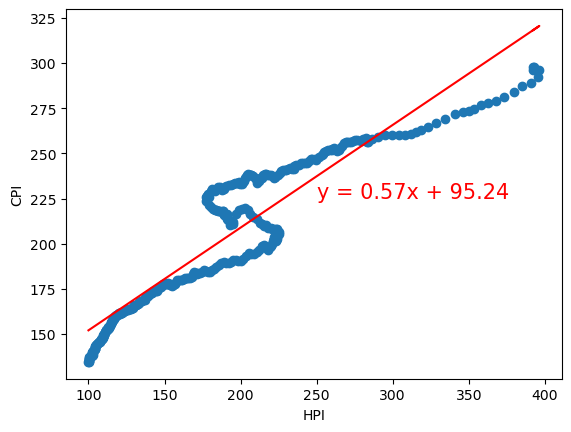

In [ ]:
# Linear regression
x_values = us_hpi_monthly['Index (SA)']
y_values = monthly_cpi_clean['CPI']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(250,225),fontsize=15,color="red")
plt.xlabel('HPI')
plt.ylabel('CPI')
plt.show()